# ¿Qué características determinan el precio de un alquiler de Airbnb?

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns

from   collections           import Counter
from   datetime              import datetime
import folium  #needed for interactive map
from folium.plugins import HeatMap

## Introducción

**Contexto empresarial**. Airbnb es un enorme mercado en línea para que la gente común alquile lugares para quedarse. Es un mercado grande y lucrativo, pero muchos vendedores son simplemente personas que alquilan su propia residencia principal para visitas cortas. Incluso los proveedores más grandes suelen ser pequeñas empresas con solo un pequeño número de lugares para alquilar. Como resultado, tienen una capacidad limitada para evaluar tendencias a gran escala y establecer precios óptimos.

Airbnb ha lanzado un nuevo servicio para ayudar a las listas a fijar precios. Airbnb hace una comisión porcentual fuera de los listados, por lo que están incentivados para ayudar a los precios de los Listas de manera óptima; es decir, en el punto máximo posible donde aún cerrarán un trato. Eres un consultor de Airbnb que ayuda con este nuevo servicio de precios.

**Problema comercial**. Su tarea inicial es explorar los datos con el objetivo de responder la pregunta: <b> "¿Qué características son más relevantes para el precio de una lista de Airbnb?" </b>

**Contexto analítico**. Utilizaremos el conjunto de datos bien mantenido y disponible públicamente creado por el grupo de defensa Inside Airbnb. Nos enfocaremos en listados en la ciudad de Nueva York durante el último año, aprovechando conjuntos de datos más grandes cuando haya detalles importantes para explorar.

El caso se estructura de la siguiente manera: 

(1) haremos una exploración básica de datos trazando distribuciones de cantidades clave; 

(2) introducir el concepto de correlación para encontrar las características clave; 

(3) presentar la idea de los efectos de interacción para corregir los efectos de las características clave; 

(4) discuta cómo generar hipótesis de forma iterativa y elegir visualizaciones de datos para apoyar sus conclusiones; 

(5) observe un tipo muy específico de efecto de interacción, el efecto temporal y cómo corregirlo; y finalmente 

(6) juntar todo para identificar los factores clave que afectan el precio.

## Alguna exploración básica de datos

Comenzamos cargando los datos y observando su forma básica:

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
listings = pd.read_csv('airbnb_nyc.csv', delimiter=',')
listings.shape

(30179, 81)

Veamos también las columnas del conjunto de datos:

In [4]:
listings.columns

Index(['id', 'name', 'summary', 'description', 'experiences_offered',
       'neighborhood_overview', 'transit', 'house_rules', 'host_id',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_identity_verified',
       'street', 'neighbourhood', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'calculated_host_listings_count',


In [5]:
# We display the basic listings data.
pd.options.display.max_columns = 100
listings.head(3)

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,street,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,within an hour,1.0,0.0,6.0,1.0,"Brooklyn , NY, United States",Brooklyn,40.64749,-73.97237,Apartment,Private room,2,1.0,1,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",149,1,35,1,3 weeks ago,1,30,60,90,365,9,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,6,0,5,1,0.21,1,-1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,within a day,1.0,0.0,1.0,1.0,"New York, NY, United States",Harlem,40.80902,-73.94190,Apartment,Private room,2,1.0,1,1,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",150,2,20,3,34 months ago,1,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,strict_14_with_grace_period,1,0,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,within a day,1.0,0.0,2.0,1.0,"New York, NY, United States",Harlem,40.79685,-73.94872,Apartment,Entire home/apt,4,1.0,2,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",190,1,0,7,7 weeks ago,1,4,14,14,249,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,2,1,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1


Los siguientes son detalles sobre algunas de las columnas importantes aquí:

1. ```neighbourhood```:  en qué vecindario se encuentra la propiedad
2. ```longitude```, ```latitude```: longitud y latitud
3. ```property_type```: tipo de propiedad, como apartamento, condominio, etc.
4. ```bathrooms```: número de baños
5. ```bedrooms```: número de dormitorios
6. ```price```:  precio del listado
7. ```number_of_reviews```: número de comentarios dados por clientes que se quedaron allí
8. ```parking```: 1 significa que hay estacionamiento disponible, -1 significa que no hay

Para otras variables categóricas, como ```outdoor_friendly```, ```gym```, etc., the 1,-1 debe interpretarse de manera similar a ```
parking``` como se explicó anteriormente.

### Trazar las distribuciones marginales de cantidades clave de interés

Como ha visto en los casos de Python, es bueno desarrollar primero una idea de cómo se distribuyen los valores de algunas cantidades clave de interés. Comencemos por hacerlo para algunas variables numéricas, como ```price```, ```bedrooms```,``` bathroom```, ```number_of_reviews```:

### Ejercicio 1:

#### 1.1

Use los comandos ```describe()``` y ```quantile ([0.9,0.95,0.99])``` para calcular algunas estadísticas de resumen importantes para las variables anteriores.

In [6]:
listings[['price', 'bedrooms', 'bathrooms', 'number_of_reviews']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,30179.0,132.949965,93.151824,0.0,65.0,100.0,175.0,500.0
bedrooms,30179.0,1.265516,0.614659,1.0,1.0,1.0,1.0,11.0
bathrooms,30179.0,1.151595,0.422225,0.5,1.0,1.0,1.0,7.5
number_of_reviews,30179.0,4.459889,5.265633,0.0,0.0,2.0,7.0,20.0


In [7]:
listings[['price', 'bedrooms', 'bathrooms', 'number_of_reviews']].quantile([0.9, 0.95, 0.99]).T

,0.90,0.95,0.99
price,250.0,325.0,450.0
bedrooms,2.0,3.0,4.0
bathrooms,2.0,2.0,2.5
number_of_reviews,13.0,16.0,20.0


#### 1.2

Use la función ```plt.hist()``` para trazar el histograma de las variables anteriores. ¿Cuáles son sus formas básicas (por ejemplo, normal, sesgada, multimodal, etc.)?

In [8]:
from IPython.display import Image
Image('/content/drive/My Drive/ML_COURSES_CEC/Ciencia de Datos con Python/Estudiantes/Notebooks/Matplotlib y Seaborn/curvasFreq.jpg')

FileNotFoundError: No such file or directory: '/content/drive/My Drive/ML_COURSES_CEC/Ciencia de Datos con Python/Estudiantes/Notebooks/Matplotlib y Seaborn/curvasFreq.jpg'

FileNotFoundError: No such file or directory: '/content/drive/My Drive/ML_COURSES_CEC/Ciencia de Datos con Python/Estudiantes/Notebooks/Matplotlib y Seaborn/curvasFreq.jpg'

<IPython.core.display.Image object>

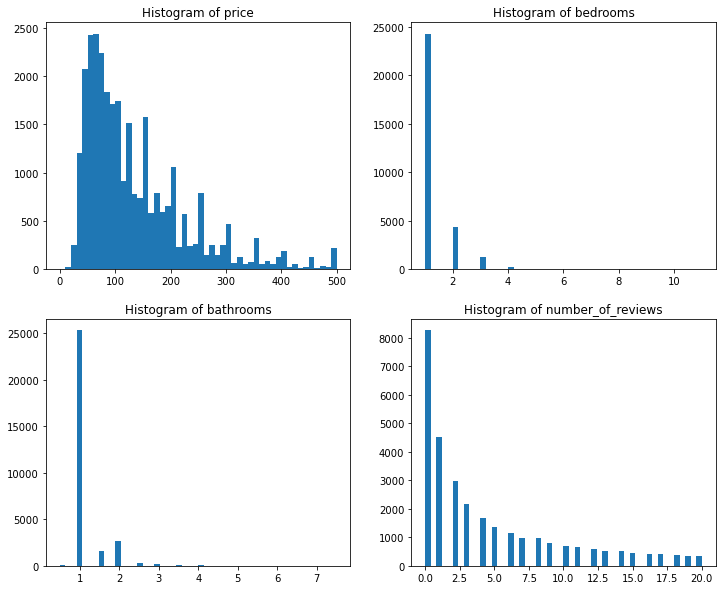

In [9]:
#subplot, divide el area de los graficos, se indica la posición
plt.figure(figsize=(12,10))
vars_to_plot = ['price', 'bedrooms','bathrooms','number_of_reviews']

for i, var in enumerate(vars_to_plot): # i=0, var='price'
    plt.subplot(2,2,i+1) # plt.subplot(2,2,1)
    plt.hist(listings[var],50) # plt.hist(listings['price'],50)
    title_string = "Histogram of " + var # "Histogram of price"
    plt.title(title_string) # plt.title("Histogram of price")

### Otra forma de ver el histograma del número de habitaciones

A veces, es mejor mirar un histograma que traza los porcentajes <i> relativos </i> de valores en todas las categorías:

In [10]:
# How many bedrooms
# diccionario con las frecuencias
bedrooms_counts = Counter(listings.bedrooms)
bedrooms_counts

Counter({1: 24254, 2: 4321, 3: 1241, 5: 62, 4: 279, 6: 14, 8: 3, 11: 1, 7: 4})

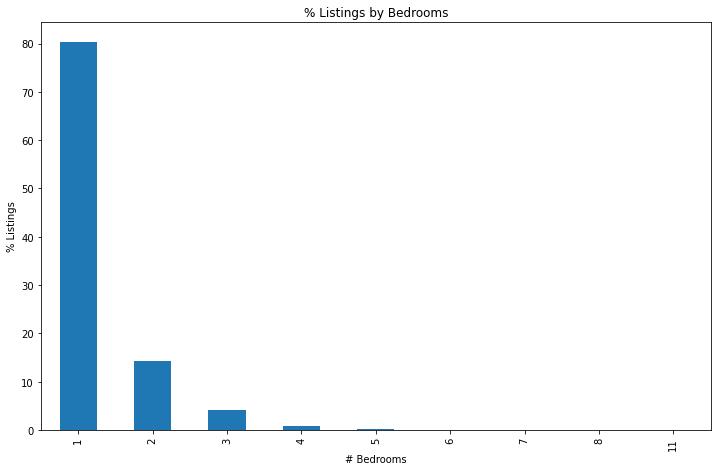

Percent of 1 Bedroom Listings: %80.37


In [11]:
tdf = pd.DataFrame.from_dict(bedrooms_counts, orient = 'index').sort_values(by = 0)
tdf = (tdf.iloc[-10:, :] / len(listings)) * 100

# Sort bedroom dataframe by number
tdf.sort_index(axis = 0, ascending = True, inplace = True)

# Plot percent of listings by bedroom number
ax = tdf.plot(kind = 'bar', figsize = (12, 7.5))
ax.set_xlabel("# Bedrooms")
ax.set_ylabel("% Listings")
ax.set_title('% Listings by Bedrooms')
ax.legend_.remove()

plt.show()

print("Percent of 1 Bedroom Listings: %{0:.2f}".format(tdf[0][1])) 
#The syntax 0:.2f denotes that we will print upto to decimal places
#Change it to %{0:.3f to see what happens}

## Inspección de precios contra variables de interés

Ahora que hemos analizado las variables de interés de forma aislada, tiene sentido analizarlas en relación con el precio.

### Ejercicio 2:

#### 2.1
Escriba el código para hacer un diagrama de caja de ```price``` vs. ```bedrooms```, ```bathrooms```, ```number_of_reviews```, ```review_scores_cleanliness```.

In [12]:
vars_to_plot = ['price', 'bedrooms','bathrooms','number_of_reviews']
list_counter = []

#for i, var in enumerate(vars_to_plot):


# How many bedrooms
# diccionario con las frecuencias
#    list_counter['counter'+var] = Counter(listings.var)
#    bedrooms_counts



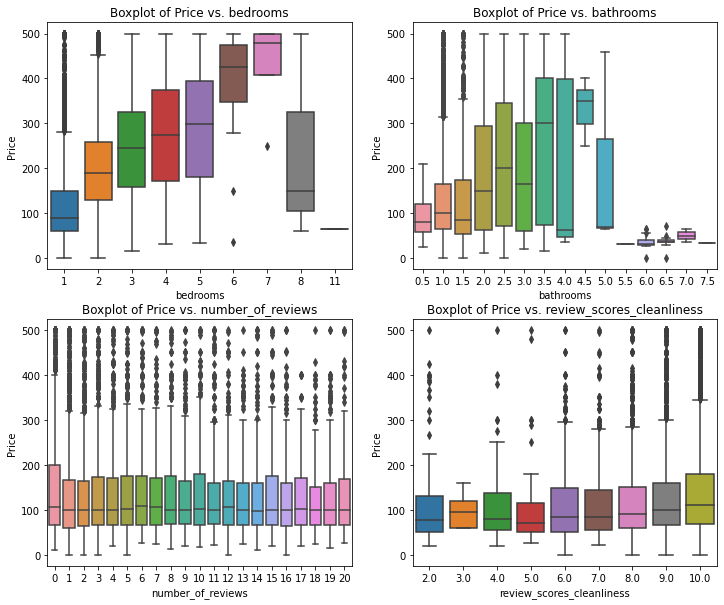

In [13]:
# Your code
plt.figure(figsize=(12,10))
vars_to_plot = ['bedrooms','bathrooms','number_of_reviews','review_scores_cleanliness']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = var, y='price', data = listings)
    title_string = "Boxplot of Price vs. " + var
    plt.ylabel("Price")
    plt.title(title_string)

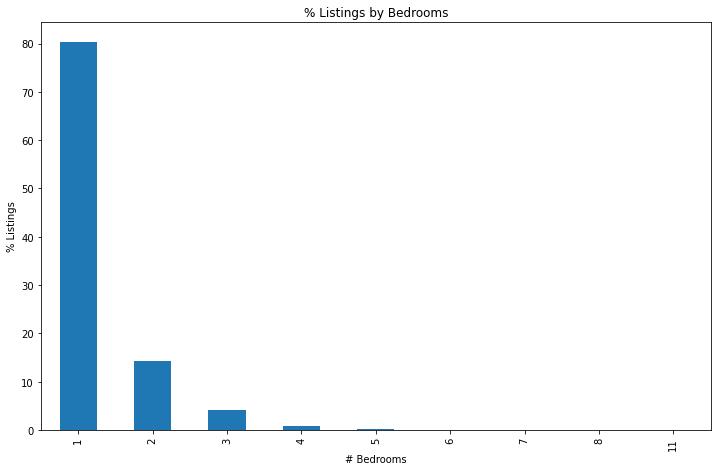

Percent of 1 Bedroom Listings: %80.37


In [14]:
tdf = pd.DataFrame.from_dict(bedrooms_counts, orient = 'index').sort_values(by = 0)
tdf = (tdf.iloc[-10:, :] / len(listings)) * 100

# Sort bedroom dataframe by number
tdf.sort_index(axis = 0, ascending = True, inplace = True)

# Plot percent of listings by bedroom number
ax = tdf.plot(kind = 'bar', figsize = (12, 7.5))
ax.set_xlabel("# Bedrooms")
ax.set_ylabel("% Listings")
ax.set_title('% Listings by Bedrooms')
ax.legend_.remove()

plt.show()

print("Percent of 1 Bedroom Listings: %{0:.2f}".format(tdf[0][1])) 
#The syntax 0:.2f denotes that we will print upto to decimal places
#Change it to %{0:.3f to see what happens}

### Investigando correlaciones

Aunque trazar la relación entre el precio y algunas otras variables es un buen primer paso, en general hay demasiadas variables para trazar individualmente e inspeccionar manualmente. Necesitamos un método más sistemático. ¿Como procedemos? Una manera fácil de obtener una visión general rápida de las variables clave que afectan el precio es a través de <b> correlación </b>.

Echemos un vistazo nuevamente a la trama ``price`` vs. ``bedrooms``:

Text(0.5, 1.0, 'Boxplot of Price vs. Bedrooms')

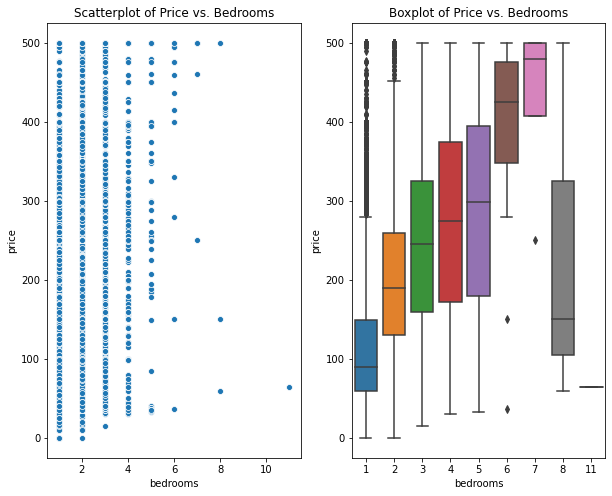

In [15]:
plt.figure(figsize=(10,8))
plt.subplot(121)
sns.scatterplot(x='bedrooms',y = 'price', data = listings)
plt.ylabel("price")
plt.title("Scatterplot of Price vs. Bedrooms")
plt.subplot(122)
sns.boxplot(x='bedrooms',y= 'price', data = listings)
plt.ylabel("price")
plt.title("Boxplot of Price vs. Bedrooms")

Vemos que a medida que aumenta el número de habitaciones, aumenta el precio en promedio. La cantidad de <b> correlación </b> es una forma de capturar esta relación. La correlación de dos cantidades es una medida de cuánto tienden a aumentar juntas, medida en una escala que va de -1 a 1. Una correlación positiva entre el precio y el número de habitaciones indicaría que los listados de precios más altos tienden a tener <i> más </i> dormitorios. Del mismo modo, una correlación negativa entre el precio y el número de habitaciones indicaría que los listados de precios más altos tienden a tener <i> menos </i> habitaciones. En nuestro caso, podemos ver fácilmente que el precio se correlaciona positivamente con las habitaciones.

Dado que la correlación es solo un número que resume una distribución conjunta completa, puede ser engañoso y no elimina la necesidad de trazar e inspeccionar visualmente las variables clave que sugiere que son importantes. No obstante, es bastante útil cuando se escanea rápidamente para encontrar relaciones muy fuertes en los datos y se reduce una lista mucho más grande de factores potenciales.

In [16]:
np.corrcoef(listings['price'],listings['bedrooms'])[0,1]

0.4545392952627167

La <b> matriz de correlación </b> proporciona todas las correlaciones por pares entre todas las variables. Podemos obtener una visión general rápida de las variables clave que afectan el precio mirando su fila en la matriz de correlación.

### Ejercicio 3:

#### 3.1 Escribir código para calcular la matriz de correlación entre el precio y otras cantidades.
(use la función ``.corr()``).

#### 3.2 Imprima las columnas que están positivamente correlacionadas, en orden creciente de la correlación.
#### 3.3 Imprima las columnas que están correlacionadas negativamente, en orden creciente de la magnitud de la correlación.

In [17]:
correlaciones = listings.corr()

In [18]:
correlaciones[correlaciones['price']>0]['price']

id                                             0.027533
host_id                                        0.028931
host_response_rate                             0.034280
host_listings_count                            0.194891
latitude                                       0.079542
accommodates                                   0.571541
bathrooms                                      0.163276
bedrooms                                       0.454539
beds                                           0.421355
price                                          1.000000
guests_included                                0.321970
extra_people                                   0.075439
minimum_nights                                 0.048627
availability_30                                0.075208
availability_60                                0.099858
availability_90                                0.093483
availability_365                               0.118864
review_scores_rating                           0

In [19]:
correlaciones[correlaciones['price']<0]

,id,host_id,host_since,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
host_since,0.530654,0.905404,1.000000,0.029362,-0.005315,0.056799,-0.460919,0.043202,0.133671,0.059946,0.037348,0.021578,0.082001,-0.009671,0.051555,0.000478,-0.003294,NaN,0.239441,0.273200,0.291389,0.242459,-0.052206,0.162810,-0.090009,-0.087586,-0.022991,-0.082780,-0.104489,-0.027066,-0.065790,0.289922,0.144230,0.119375,0.134057,0.077951,0.360644,-0.126710,0.026867,-0.000546,0.003265,0.006753,0.026418,0.137461,0.023077,0.036480,0.115689,0.082969,-0.047184,-0.005512,0.034853,-0.213517,0.033959,0.003663,0.032550,0.008638,-0.024976,0.102444,-0.037173,0.134174,-0.033657,0.027736,0.017108,-0.038432,0.020046
host_is_superhost,0.062122,0.002383,-0.005315,0.133280,1.000000,-0.021501,-0.000838,-0.017228,0.064378,0.026010,-0.003154,0.022136,0.020835,-0.016325,0.038419,0.065973,0.048219,NaN,0.034459,0.051846,0.062296,0.084598,0.246618,0.278945,0.113434,0.096486,0.118412,0.079193,0.081936,0.047967,0.091963,0.009774,-0.002636,-0.041604,0.199202,-0.016710,0.102082,-0.002945,0.039159,0.012663,0.026205,0.065132,0.017904,0.142496,0.021276,0.027264,0.137013,0.134466,0.007642,-0.051817,-0.027200,-0.003716,0.179669,0.074773,0.091193,-0.018348,0.030957,0.136806,-0.021250,0.080201,0.048612,0.123705,-0.025842,0.042958,-0.011303
host_identity_verified,-0.351613,-0.471233,-0.460919,-0.021462,-0.000838,-0.131024,1.000000,-0.032725,-0.074073,-0.033701,-0.045146,-0.019505,-0.049703,-0.022861,-0.027442,-0.008758,-0.046419,NaN,-0.173123,-0.199591,-0.212159,-0.190038,0.056471,-0.128929,0.059404,0.057862,0.010423,0.062030,0.081616,0.007361,0.049873,-0.203012,-0.136013,-0.119219,-0.097641,-0.043654,-0.247966,0.110995,-0.004642,0.023740,-0.035580,-0.018091,-0.013138,-0.117958,-0.017456,-0.021155,-0.093310,-0.070402,0.023144,-0.011646,-0.038365,0.152597,-0.038122,-0.014069,-0.058010,-0.008715,0.025243,-0.082129,0.010316,-0.112959,0.030771,-0.024953,-0.010547,0.041090,-0.001946
longitude,0.109353,0.128454,0.133671,0.018393,0.064378,-0.118728,-0.074073,0.090186,1.000000,-0.038002,0.026478,-0.005668,0.002212,-0.294196,0.014550,0.006009,-0.088521,NaN,0.139911,0.132859,0.145101,0.088429,0.038531,0.081313,-0.019139,-0.007927,0.002983,-0.001935,-0.015992,-0.150044,0.004476,0.064923,-0.124968,-0.146017,0.086755,0.008753,0.104967,-0.055361,-0.075408,-0.001749,-0.014921,0.023244,0.027883,-0.001603,0.044223,-0.048859,0.008295,0.004229,-0.114064,-0.165746,-0.123091,-0.071853,0.173058,0.056811,0.042471,-0.031073,-0.032670,0.001504,-0.042472,0.091139,0.009031,0.024616,0.046009,0.031948,0.021722
number_of_reviews,-0.099074,-0.031790,-0.052206,0.101951,0.246618,-0.091274,0.056471,-0.013115,0.038531,0.055434,-0.016648,0.001883,0.042115,-0.029229,0.117856,0.153106,-0.135303,NaN,0.046849,0.053660,0.057739,0.067728,1.000000,0.730990,0.066106,0.091076,0.095826,0.086939,0.093329,0.053091,0.080711,0.035968,-0.064782,-0.058195,-0.044166,0.009045,0.336207,0.028552,0.064547,0.036679,0.019540,0.070354,0.022386,0.169309,-0.002536,0.019464,0.163511,0.195273,-0.00819

In [20]:
pos_cor = correlaciones['price'] > 0

In [21]:
correlaciones['price'][pos_cor].sort_values(ascending = False)

price                                          1.000000
accommodates                                   0.571541
bedrooms                                       0.454539
beds                                           0.421355
guests_included                                0.321970
tv                                             0.271563
elevator                                       0.229610
calculated_host_listings_count_entire_homes    0.218890
white_goods                                    0.214283
gym                                            0.209892
child_friendly                                 0.206189
air_conditioning                               0.196582
host_listings_count                            0.194891
calculated_host_listings_count                 0.185098
bathrooms                                      0.163276
private_entrance                               0.146453
review_scores_location                         0.140308
coffee_machine                                 0

## Ubicación

En el ejercicio 3, encontramos bastantes variables que están razonablemente correlacionadas con el precio. Podríamos continuar nuestra exploración observando cada una de estas variables, pero sabemos que en el sector inmobiliario, los datos de ubicación son bastante especiales, por lo que primero exploraremos cómo la ubicación afecta el precio con mayor detalle.

Utilizaremos el paquete ``folium``. Asegúrese de haber instalado el paquete (si no, ¡hágalo ahora!). A continuación se ofrece un mapa interactivo para trazar los listados en un mapa de la ciudad de Nueva York:

In [22]:
folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="OpenStreetMap")
folium_map
# This sets up a basic map of NYC. You can try to change the "tiles" option above.
# The options you have are: "OpenStreetMap", Mapbox Bright","Stamen Toner","Mapbox Control Room","Stamen Terrain"

In [23]:
folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="OpenStreetMap")
#Now we can have a scatter plot of the first 1000 data points on the above map
for i in range(0,1000):
    marker = folium.CircleMarker(location=[listings["latitude"][i],listings["longitude"][i]],radius=5,color="r",fill=True)
    marker.add_to(folium_map)

folium_map

### Uso de mapas de calor para comprender la distribución de precios con ubicación

A continuación, creamos un mapa de calor del precio de los apartamentos en Nueva York. Esto nos dará una idea de dónde están las ubicaciones importantes:

In [24]:
max_amount = float(listings['price'].max())

folium_hmap = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="OpenStreetMap")

hm_wide = HeatMap( list(zip(listings['latitude'], listings['longitude'], listings['price'])),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=8, blur=6, 
                   max_zoom=15, 
                 )

folium_hmap.add_child(hm_wide)

### Ejercicio 4:

#### 4.1
¿Qué áreas de Nueva York tienen alquileres caros?

#### 4.2

Mirando este mapa, puede (aproximadamente) ver la correlación entre el precio y la longitud / latitud. ¿La ubicación parece estar fuertemente relacionada con el precio? ¿Parece probable que esta relación pueda ser captada bien por un modelo lineal?

#### 4.3 Escriba el código para hacer un diagrama de dispersión entre el precio y la longitud, con el número de habitaciones clasificadas por color.

In [25]:
# Your Code

In [26]:
# Create a correlation matrix
corr = listings.corr()
pos_cor = corr['price'] >0
neg_cor = corr['price'] <0
corr['price'][pos_cor].sort_values(ascending = False)
#This prints out the coefficients that are positively correlated with price.
corr['price'][neg_cor].sort_values()

longitude                                      -0.294196
calculated_host_listings_count_private_rooms   -0.127504
calculated_host_listings_count_shared_rooms    -0.101389
smoking_allowed                                -0.054131
host_greeting                                  -0.051356
number_of_reviews                              -0.029229
host_identity_verified                         -0.022861
parking                                        -0.019383
host_is_superhost                              -0.016325
number_of_reviews_ltm                          -0.011481
host_since                                     -0.009671
review_scores_value                            -0.005942
Name: price, dtype: float64

Al mirar la lista de correlaciones, ``parking`` se destacó por tener una correlación sorprendentemente negativa con el precio. Hemos visto que la ubicación tiene una fuerte influencia en el precio; veamos si puede ayudar a explicar la correlación negativa exhibida por ``parking``.

### Ejercicio 5:

Escriba el código aquí para trazar las primeras 1000 ubicaciones en el mapa donde el estacionamiento está disponible en color azul, y las primeras 1000 ubicaciones donde el estacionamiento no está disponible en color rojo. (Sugerencia: puede usar el comando: color = "blue" y "red" respectivamente).

In [27]:
# Your Code
lat_log_parking_yes = listings.loc[ listings['parking']==1.0, ["latitude","longitude" ] ]
lat_log_parking_no = listings.loc[ listings['parking']==-1.0, ["latitude","longitude" ] ]
folium_map = folium.Map(location=[40.738, -73.98],
zoom_start=13,
tiles="OpenStreetMap")
for i in range(1000):
    marker = folium.CircleMarker(location=[lat_log_parking_yes["latitude"].iloc[i],lat_log_parking_yes["longitude"].iloc[i]],radius=5,color="blue",fill=True)
    marker.add_to(folium_map)



for i in range(1000):
    marker = folium.CircleMarker(location=[lat_log_parking_no["latitude"].iloc[i],lat_log_parking_no["longitude"].iloc[i]],radius=5,color="red",fill=True)
    marker.add_to(folium_map)

folium_map

## Efectos de interacción e hipótesis iterativas

Ahora que hemos explorado algunos de los factores que se espera que afecten el precio, concentrémonos en comprender las correlaciones inesperadas, como la correlación negativa con el estacionamiento. Comenzamos con lo último:

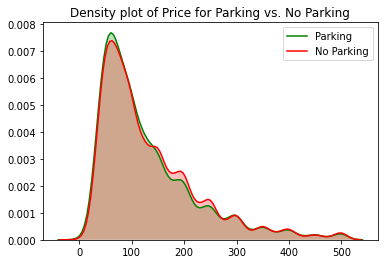

In [28]:
# First, plot parking vs. non-parking prices.
sns.kdeplot(listings.loc[listings['parking'] == 1,'price'],shade = True, label="Parking",color="g")
sns.kdeplot(listings.loc[listings['parking'] == -1,'price'],shade = True, label="No Parking",color="r")
plt.title("Density plot of Price for Parking vs. No Parking");

Vimos antes que la correlación entre precio y estacionamiento es -0.019383. Como el estacionamiento es deseable, esperamos que el precio aumente con el estacionamiento. Cuando vemos un patrón como este, debemos sospechar la existencia de **efectos de interacción** que están complicando la relación entre estacionamiento y precio. Los efectos de interacción son cuando la relación entre dos variables es **condicional**, o depende del valor de una tercera variable oculta.

¿Cuál podría ser esta tercera variable? Bueno, hemos visto que la ubicación tiene un gran impacto en los precios. ¿Quizás las áreas de precios altos no tienen muchos lugares de estacionamiento, mientras que las áreas de precios bajos sí? No lo sabemos con certeza, pero es una suposición que vale la pena.

Más formalmente, planteamos la hipótesis de que esta correlación negativa observada es el resultado de los efectos de interacción derivados de la ubicación. Para investigar esta hipótesis, debemos desglosar las ubicaciones por vecindario y ver si esta correlación negativa entre el precio y el estacionamiento aún se mantiene dentro de los vecindarios. Los vecindarios son discretos y hay muchos listados por vecindario, por lo que simplemente podemos calcular la correlación para cada vecindario individualmente. Matemáticamente, esto es exactamente lo mismo que condicionar el vecindario y calcular la correlación condicional.

### Ejercicio 6:

#### 6.1
Escriba el código para hacer un diccionario en el que las claves son los `neighbourhoods` en el conjunto de datos y los valores son la correlación entre el precio y el estacionamiento para ese vecindario.


#### 6.2
A continuación, trace un histograma de estas correlaciones.

In [29]:
np.corrcoef(listings[listings['neighbourhood']== 'Brooklyn']['price'],listings[listings['neighbourhood']=='Brooklyn']['parking'],)

array([[1.        , 0.07324986],
       [0.07324986, 1.        ]])

In [34]:
vecindarios = listings['neighbourhood'].unique()


In [35]:
cvec = {}
for x in vecindarios:
    temp = listings[listings['neighbourhood'] == x] #se filtra el dataset
    cvec[x] = temp.corr()['price']['parking'] #correlación para el vecindario que se filtro

In [36]:
res = list(cvec.values())#se dejan los q no sean nulos
res = [x for x in res if str(x) != 'nan']
res.sort()

In [41]:
cvec

{'Brooklyn': 0.07324985853986331,
 'Harlem': 0.06439927259749706,
 'Manhattan': 0.0014116378206741884,
 'Flatbush': 0.07032276993588919,
 'Clinton Hill': 0.10039090504288772,
 'Hamilton Heights': -0.013513827281271163,
 'Gowanus': 0.14031028261026218,
 'Lefferts Garden': -0.03739996883474221,
 'Greenpoint': 0.05199466347212524,
 'Boerum Hill': 0.2048275980114942,
 'Kew Garden Hills': 0.3131510759799468,
 'Queens': 0.06333545722178238,
 'Upper East Side': -0.029414027430782187,
 'Ditmars / Steinway': -0.06951507964090892,
 'Upper West Side': -0.015107498957511775,
 'The Bronx': 0.1646808791054178,
 'Williamsburg': 0.07512018579537752,
 'East Village': 0.03417231289203759,
 'Park Slope': 0.07910049544148019,
 'Kingsbridge Heights': -0.8976595391518659,
 'Crown Heights': 0.15467839382795065,
 'Bedford-Stuyvesant': 0.09145076879021433,
 'The Rockaways': 0.08435526182625007,
 'Chelsea': 0.017274023766383543,
 'Carroll Gardens': -0.031593394507984034,
 'Gravesend': 0.38070559759710504,
 'Bus

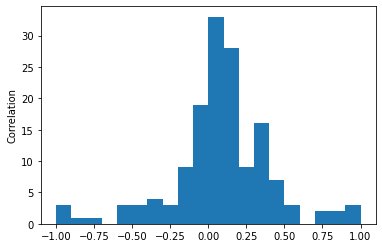

Average correlation:  0.08178058684472027


In [38]:
plt.hist(res, bins=20)
plt.ylabel('Correlation')
plt.show()

print('Average correlation: ', sum(res)/len(res))

In [39]:
#listings[listings['neighbourhoods']=='Brooklyn'].head()

#### 6.3 Explique la relación entre el histograma y nuestro hallazgo de que el estacionamiento está correlacionado negativamente con el precio.

#### 6.4
Trace el histograma que superpone la distribución de precios para estacionamiento y no estacionamiento (use sns.kdeplot) para los vecindarios: `St. George`,`Greenwood Heights`,`Rego Park`,`Brooklyn Navy Yard`.

In [44]:
vecindarios_filtrados = ['St. George', 'Greenwood Heights', 'Rego Park' , 'Brooklyn Navy Yard']
for y in vecindarios_filtrados:
    for i in cvec:
        if y == cvec.keys():
            pass

#sns.kdeplot(listings.loc[listings['parking'] == 1,'price'],shade = True, label="Parking",color="g")
#sns.kdeplot(listings.loc[listings['parking'] == -1,'price'],shade = True, label="No Parking",color="r")
#plt.title("Density plot of Price for Parking vs. No Parking");

In [ ]:
plt.figure(figsize=(12,10))
neigh_to_look = ['St. George','Greenwood Heights','Rego Park','Brooklyn Navy Yard']


for i, neigh in enumerate(neigh_to_look):
    plt.subplot(2,2,i+1)
    sns.kdeplot(listings.loc[(listings['parking'] == 1) & (listings['neighbourhood'] == neigh),'price'],shade = True, label="Parking",color="g")
    sns.kdeplot(listings.loc[(listings['parking'] == -1) & (listings['neighbourhood'] == neigh),'price'],shade = True, label="No Parking",color="r")
    plt.title("Parking vs. No Parking for neighboorhood = " + str(neigh));

### Encontrar más interacciones: ¿cómo varía el precio según el tipo de propiedad?

Vimos que encontrar correlaciones o interacciones condicionales es una buena manera de generar más hipótesis, ya que surgen muchas líneas interesantes de investigación al investigar estas **variables de confusión**. Aquí hay otro ejemplo: veamos ahora cómo varía el precio con el tipo de propiedad. El siguiente código representa el precio de un listado de una habitación desglosado por tipo de propiedad:

## Ejercicio 7

#### 7.1
Escriba el código para hacer un diagrama de caja del precio de la propiedad de una habitación en todos los tipos de propiedad.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

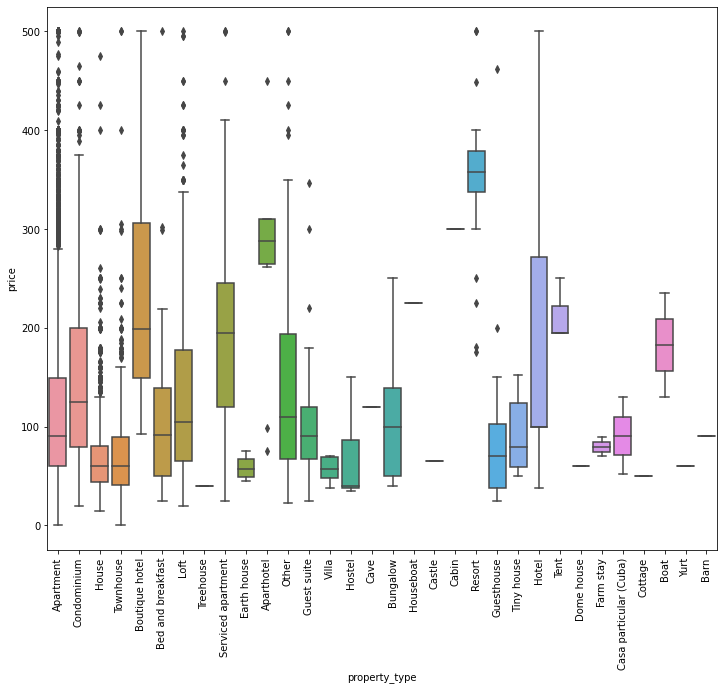

In [47]:
plt.figure(figsize=(12,10))
sns.boxplot(y=listings.loc[listings['bedrooms']==1,'price'], x= listings.loc[listings['bedrooms']==1,'property_type'])
plt.xticks(rotation = 90)

In [46]:
tipos_propiedad = listings['property_type'].unique()

#### 7.2

¿Qué puede concluir sobre la variación en el precio de un dormitorio por tipo de propiedad?

#### 7.3

Haga el mismo precio vs. tipo de propiedad para listados de dos dormitorios.

#### 7.4

Elija cualquier otra variable de su elección y haga otra gráfica interactiva, que muestre la variación del precio desglosada por subcategorías de esa variable.

### Más generación de hipótesis

Hasta ahora, nos ha interesado principalmente entender qué factores influyen en el precio de una lista existente. Sin embargo, una pregunta natural es ¿qué puede hacer para aumentar el precio de su propio listado sin gastar demasiado dinero?

Mirando a través de la lista de correlaciones, dos se destacan de inmediato:

| Object          | Correlation  | 
| :-------------  | :----------: | 
|  AC             | 0.18         | 
|  TV             | 0.26         | 

Algunos equipos de aire acondicionado son relativamente baratos y tienen una gran correlación de 0.189. Los televisores son muy baratos y tienen una enorme correlación de 0.26. Esto sugiere que una de las mejores cosas que puedo hacer para una lista es agotarme y comprar un televisor si no tengo uno: ¡un televisor de 300 dólares podría aumentar el valor de una lista en 30 dólares por noche!